<div align="center"><h1>Control Engineering Basics</h1>
<br><b>Dr.Varodom Toochinda</b>
<br>Dept. of Mechanical Engineering, Kasetsart University</div>

<a href="https://colab.research.google.com/github/dewdotninja/control_python/blob/master/ceb_m1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 1: Transfer Functions and Frequency Responses

<b>Requirement : </b> Python 3 with Scipy & Python control systems
<p />Execute the commands below to install Python control systems library in Colab    


In [ ]:
!pip install control

This article is contained in Control Engineering Basics study module, which is used as course material for Electrical-Mechanical Manufacturing Engineering (EMME), Department of Mechanical Engineering, Kasetsart University.

### Module Key Study Points
* How to create transfer functions using Scipy.signal or Python control systems library
* Frequency response concept
* Plotting frequency responses

In general, the first step for control system analysis and design is to acquire a model that represents the actual 
plant to be controlled. Then a feedback diagram is constructed with this plant model and a controller described as 
transfer functions, either in continuous or discrete time domain. For analysis and design in frequency domain such 
as the so-called classical method, loopshaping, or Quantitative Feedback Theory (QFT), some form of frequency 
response data is needed. Hence, in this module we show how to formulate a transfer function in Python and plot 
its frequency response.

### Transfer Function Formulation
<br>To be concrete, we consider in Figure 1 a simple diagram of robot joint driven by DC motor through a gear 
transmission with ratio r:1 [1].
<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1g-NGTzGm0qubXOy4D6mO58LXJ0KIG256" />
</p>
<div align="center"><b>Figure 1 robot joint connected to DC motor via a gear transmission</b></div>

<br>Let J<sub>m</sub> = J<sub>a</sub> + J<sub>g</sub>  be the sum of motor and gear inertia. By simple calculation, 
it is easy to show that the rotational motion in terms of &theta;<sub>m</sub> is described by
\begin{equation}
J_m\frac{d^2\theta_m}{dt^2}+B_m\frac{d\theta_m}{dt} = \tau_m - \frac{\tau_l}{r}=k_ti_a - \frac{\tau_l}{r}   
\end{equation}
<div align="right">(1)</div>
<p />where k<sub>t</sub> represents torque constant. We want to describe a model in transfer function form so that 
a block diagram can be drawn. To develop the electrical side of DC motor, consider the  model shown in Figure 2. 
<p align="center">
<img src="https://drive.google.com/uc?id=1BEviD4Zrwc6vvqaHtuA5lTY9pXw9v-XV" />
</p>
<div align="center"><b>Figure 2  a model of permanent magnet DC motor</b></div>
<p />By Kirschoff’s voltage law, we have

\begin{equation} 
L_ai_a + R_ai_a = v_a - k_e\dot{\theta}_m   
\end{equation}
<div align="right">(2)</div>
<p />where k<sub>e</sub>  is back emf constant. From now on we omit the a subscript in the armature inductance 
and resistance. It is left to the reader to verify that, in Laplace domain, the joint dynamics in Figure 1 
can be described by
\begin{equation}  
(Ls+R)I_a(s)=V(s)-k_es\theta_m(s)   
\end{equation}
<div align="right">(3)</div>
\begin{equation} 
(J_ms^2+B_ms)\theta_m(s)=k_tI_a(s) - \frac{\tau_l(s)}{r}
\end{equation}
<div align="right">(4)</div>
<p />This can be drawn as a block diagram in Figure 3. 
<p align="center">
<img src="https://drive.google.com/uc?id=1zspuIlLiYtp3e2POtr7Tb06FWFdcjHCB" />
</p>
<div align="center"><b>Figure 3 block diagram of the robot joint dynamics in Figure 1</b></div>

<p />The transfer function from V(s)  to &theta;<sub>m</sub>  can be derived by setting &tau;<sub>l</sub> = 0 , 
which gives

\begin{equation}
\frac{\theta_m(s)}{V(s)} = \frac{k_t}{s[(Ls+R)(J_ms+B_m)+k_ek_t]}
\end{equation}
<div align="right">(5)</div>
<p />Similarly, the transfer function from &tau;<sub>l</sub>  to &theta;<sub>m</sub>  is found by setting V=0. 

\begin{equation} 
\frac{\theta_m(s)}{\tau_l(s)} = \frac{-(Ls+R)}{s[Ls+R)(J_ms+B_m)+k_ek_t]}
\end{equation}
<div align="right">(6)</div>
<p />To simplify the equation further, we can assume that the electrical constant L/R  is much smaller than the 
mechanical constant J<sub>m</sub>/B<sub>m</sub>. So the transfer functions in (5) and (6) reduce to

\begin{equation}
\frac{\theta_m(s)}{V(s)} = \frac{k_t/R}{s(J_ms+B_m+k_ek_t/R)}
\end{equation}
<div align="right">(7)</div>
\begin{equation}
\frac{\theta_m(s)}{\tau_l(s)} = \frac{-1/r}{s(J_ms+B_m+k_ek_t/R)}
\end{equation}
<div align="right">(8)</div>
<p />respectively. These two equations correspond to second order differential equation in time domain  
\begin{equation}
J_m\ddot{\theta}_m(t) + (B_m + k_ek_t/R)\dot{\theta}_m(t) = (k_t/R)V(t) - \tau_l(t)/r
\end{equation}
<div align="right">(9)</div>
<p />By omitting parameter subscripts, (9) can be rewritten as

\begin{equation} 
J\ddot{\theta}(t) + B\dot{\theta}(t) = u(t) - d(t)
\end{equation}
<div align="right">(10)</div>
<p />with B = B<sub>m</sub> + k<sub>e</sub>k<sub>t</sub>/R  represents effective damping, u = (K_t/R)V  control 
input, and d = &tau;<sub>l</sub>(t)/r  disturbance input. The reduced block diagram of (10) can be drawn as in 
Figure 4. 
<p align="center">
<img src="https://drive.google.com/uc?id=16Qnve7yCFPCsd9Pcy7kbD0OWfcWfdnMT" />
</p>
<div align="center"><b>Figure 4 reduced block diagram of robot joint dynamics</b></div>


<p />So, the transfer function for a robot joint driven by DC motor we will be using in our study modules is 
in the form

\begin{equation}
P(s) = \frac{1}{s(Js+B)}
\end{equation}
<div align="right">(11)</div>
<p />Let’s put some values to the parameters, say, J = 10, B = 0.1. Hence the resulting transfer function becomes

\begin{equation} 
P(s) = \frac{1}{10s^2 + 0.1s}
\end{equation}
<div align="right">(12)</div>



<p />Now we demonstrate how to construct a transfer mfunction such as (12) in Python. First, let's use scipy.signal  

In [2]:
from scipy import signal

In [3]:
num = 1
den = [10, 0.1, 0]
P1 = signal.TransferFunction(num,den)
print('P(s)=', P1)

P(s)= TransferFunctionContinuous(
array([0.1]),
array([1.  , 0.01, 0.  ]),
dt: None
)


Note that scipy.signal scales the numerator and denominator of the transfer function. Also, the display output is 
somewhat hard to interpret.
<p />Now use Python control systems library

In [4]:
import control

In [5]:
num = 1
den = [10, 0.1, 0]
P2 = control.tf(num,den)
print('P(s)=', P2)

P(s)= 
      1
--------------
10 s^2 + 0.1 s



Or you can just type the transfer function variable to see a nicer math format.

In [6]:
P2

TransferFunction(array([1]), array([10. ,  0.1,  0. ]))

Alternatively, a variable 's' can be created first to allow algrebaic operations for SISO systems.

In [7]:
s = control.tf('s')
P3 = 1/(10*s**2 + 0.1*s)
P3

TransferFunction(array([1]), array([10. ,  0.1,  0. ]))

### Frequency responses
<p />Figure 5 depicts frequency response concept in a nutshell. In words, for a Linear Time-Invariant (LTI) system 
driven by a sinusoid input, the output is a sinusoid with same frequency, only its magnitude A and phase &phi;  
might change. When the input frequency varies, this results in new values for A and &phi;. This pair of data 
through out a range of frequency, actually a vector of complex numbers, constitutes a frequency response for an 
LTI system.  
<p align="center">
<img src="https://drive.google.com/uc?id=1K9gUg22UlWiUrVQ885zWu0aWy1G9Wq-8" alt="Figure 5"/>
</p>
<div align="center"><b>Figure 5 An LTI system driven by sinusoid input</b></div>


### Relationship between transfer function and frequency response

<p />You may remember from linear systems course that, for a continuous-time transfer function described in terms 
of Laplace variable s, frequency response can be achieved by letting s = j&omega;. 

\begin{equation} 
P(j\omega) = P(s)\vert_{s = j\omega}
\end{equation}
<div align="right">(13)</div>
<p />By this relationship, a frequency response of a transfer function can be plotted "the hard way." Using (12) 
as an example, we solve for P(j&omega;) manually by substituting s = j&omega;, which gives

\begin{equation}
P(j\omega) = \frac{1}{-10\omega^2+0.1j\omega}
\end{equation}
<div align="right">(14)</div>
<p />Then we can plot the magnitude and phase versus frequency by generating a vector of frequency and compute 
P(j&omega;) at each frequency points. This tedious approach is not recommended though, since we can yield frequcncy
response such as Bode plot using a simple set of commands in scipy.signal

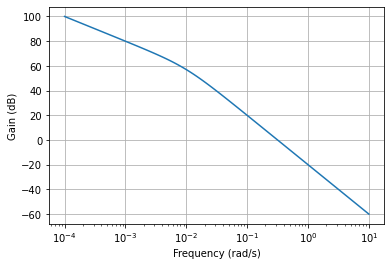

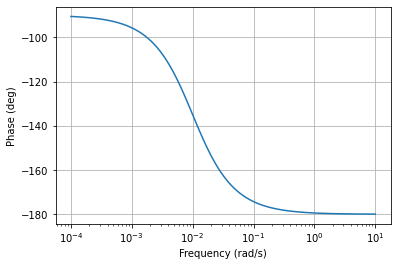

In [8]:
import matplotlib.pyplot as plt
w, mag, phase = signal.bode(P1)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid(True)
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Gain (dB)")
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid(True)
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Phase (deg)")
plt.show()

or even simpler using Python control systems library.

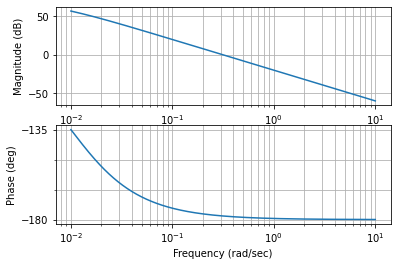

In [9]:
mag, ph, om = control.bode_plot(P2, dB=True,omega_limits=(0.01,10))

Read the 
<a href="https://python-control.readthedocs.io/en/0.8.4/generated/control.bode_plot.html#control.bode_plot">control.bode_plot 
online documenation</a> to learn more about parameters that can be used with this command.

<p /><em>Keyword: </em>the frequency range that a plant is responsive is called bandwidth. Strictly speaking, bandwidth covers 
    frequency region such that the gain is above 0.707 or -3 dB. When trying to identify bandwidth from a Bode plot, we can 
    roughly indicate the frequency point where the magnitude curve touches 0 dB line. 
 <p />Another type of frequency response useful for control design is called a Nyquist plot. Actually, it is the same data 
expressed in different format. Recall that each point of frequency response is just a complex number. When it is described 
in polar form, we get a Bode plot. A Nyquist plot, on the other hand, is the frequency response described in rectangular 
form x + jy. So it constitutes a graph in complex plane. A Nyquist plot is easily produced using command
<a href="https://python-control.readthedocs.io/en/0.8.4/generated/control.nyquist_plot.html">control.nyquist_plot</a>

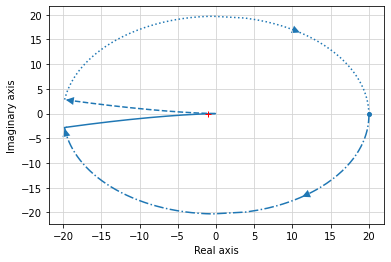

In [10]:
_ = control.nyquist_plot(P2)

<p />For the last part of this study module, we discuss an application of using frequency response that may be useful beyond 
control engineering field. A filter is an electronic circuit, either analog or digital, that can be used to alter the 
frequency response of a system to suit some particular needs. The most common one is  a low pass filter (LPF) used to 
attenuate high frequency noise. 
<p />Let’s make our plant more realistic. Suppose in our DC motor robot joint with transfer function described by (12), 
the joint angle is measured by a potentiometer and the resulting voltage is fed to a 12-bit A/D input of a microcontroller. 
The interface circuit are properly designed to use the full range of A/D; i.e., joint angle at 0 degree corresponds to A/D 
value 0, and at 360 degree, it reads as 4095. Adding this conversion factor in series with output of (12) in effect raises 
the gain by 4095/360 or 11.375. The new plant is 
\begin{equation} 
P(s) = \frac{11.375}{10s^2+0.1s}
\end{equation}
<div align="right">(15)</div>
<p />The bandwidth of (15) is about 1 rad/s, which you can verify by yourself from a Bode plot,


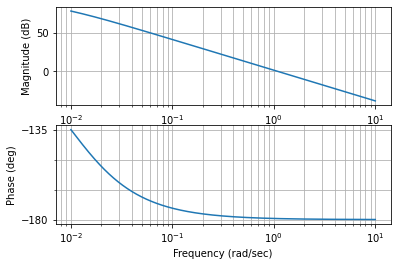

In [11]:
num3 = 11.375
den3 = [10, 0.1, 0]
P3 = control.tf(num3,den3)
mag, ph, om = control.bode_plot(P3, dB=True,omega_limits=(0.01,10))

In fact, a precise bandwidth can be computed from the magnitude and frequency arrays returned from 
control.bode_plot using the following code.

In [12]:
import numpy as np
idx = np.where(mag<0.707)[0]
om[idx[0]]

1.2738113231864785

<p />Now, suppose that during operation, the encoder circuit that measures plant output is somehow contaminated by some 
noise with higher frequency spectrum than the plant bandwidth. To make it simple, suppose the noise is a sin wave of magnitude 
0.5, and its frequency is 5 Hz (31.4 rad/s).  We want to get rid of this noise using a simple passive LPF circuit as shown in 
Figure 6,consisting of only a resistor and a capacitor. We want to design the LPF with cutoff frequency at the plant bandwidth 
0.2 Hz. Consult some analog filter design cookbook to get that the cutoff frequency of this filter can be selected from
\begin{equation} 
\omega_o = \frac{1}{RC}
\end{equation}
<div align="right">(16)</div>

<p align="center">
<img src="https://drive.google.com/uc?id=1mW_6IREpdA-AWzwoKimafdWf-RYNm9Iq" alt="Figure 6"/>
</p>
<div align="center"><b>Figure 6 A passive LPF circuit</b></div>

<p />Simple calculation shows that practical values of R = 80K&Omega;  and C = 10 &mu;F yields the cutoff frequency 1.25 rad/s
or approximately 0.2 Hz. A transfer function for this LPF can be derived easily. It is left to the reader to verify that it 
equals
\begin{equation} 
H(s) = \frac{1}{RCs+1}
\end{equation}
<div align="right">(17)</div>
<p />Substituting the chosen component values yields
\begin{equation} 
H(s) = \frac{1}{0.8s+1}
\end{equation}
<div align="right">(18)</div>
<p />Verify that the cutoff frequency is at 1.25 rad/s

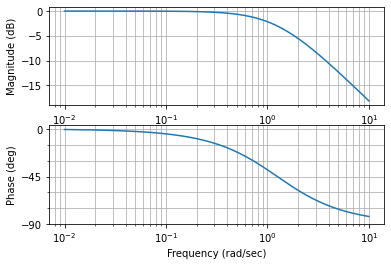

In [13]:
H = control.tf(1,[0.8,1])
mag, ph, om = control.bode_plot(H, dB=True,omega_limits=(0.01,10))

<h3>Summary</h3>
<p />In this study module, we discuss transfer function and frequency response basics. This serves as a good foundation 
for later development, such as feedback control analysis and design that relies on block diagram manipulation and frequency 
domain. Bode plot is a powerful tool used in classical control design since WWII. In the past, plotting manually on a sheet 
of paper could be tedious. Nowadays, control system software can generate magnitude and phase plots easily and 
accurately. Some basic knowledge taught in a undergrad control course is still necessary for sanity check.
<h3>Reference</h3>
<ol>
<li>M.W.Spong, S. Hutchinson and M. Vidyasagar,  Robot Modeling and Control. John Wiley & Sons. 2006. </li>
</ol>

<h3>Exercises</h3>

1. Apply sinusoid inputs to the LPF transfer function (18) to verify that it attenuates sinusoid signals with 
frequency greater than 0.2 Hz. Plot a comparison between input and output of the filter like shown in Figure X.1. 
Vary the input frequency.
<p align="center">
<img src="https://drive.google.com/uc?id=1XOFbniFF73botbPk7-5w4O3EFqfdVACt" alt="Figure X.1"/>
</p>
<div align="center"><b>Figure X.1 Comparison of LPF input and output</b></div>
<p /><b>Hint : </b> control.forced_response() might be helpful.

2. Apply a base sinusiod input at 0.1 Hz contaminated by 5 Hz noise to the LPF. THe noise should be attenuated at the 
filter output. Create a plot like shown in Figure X.2.
<p align="center">
<img src="https://drive.google.com/uc?id=1dMfW-vTCwxoEllZhz7vZJ8gQTsxvrI_T" alt="Figure X.2"/>
</p>
<div align="center"><b>Figure X.2 High frequency noise is attenuated at the output of LPF</b></div>



<b>Last Updated : </b> October 24, 2022

Update list :
<ul>
<li />October 24, 2022 : remove <code>!pip install slycot</code> 
<li />May 3, 2021 : change nyquist_plot() format to control v. 0.9.0
</ul>   

<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja<br>Copyright 2021</div>